In [1]:
# The code below 1) does a train/test split; 2) generates linear and quadratic models; 3) plots residuals for each model; 4) compares mean and root mean squared error for each model

# Task: Using BostonHousing.csv modify all of the cells below as needed to compute (and plot) the mean square error and root mean square error for basic linear regression and quadratic regression.  Plot RM againsts LSTAT

In [2]:
# Import packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [3]:
# Load Boston Housing Date
#Insert your code
BH = pd.read_csv("BostonHousing.csv")

In [4]:
# Drop rows with missing 
#print(BH.shape)
BH = BH.dropna()
#print(BH.shape)
#Extract columns
X = BH["LSTAT"]
y = BH["RM"]

In [5]:
# Split data into train and test sets
# These are pandas data frames
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)


In [6]:
# Create a linear model using the training set and predictions using the test set
#transform a data frame to a numpy array,which is what sklearn class LinearRegression expects
X_test = np.asarray(X_test)  #returns a pandas dataframe
y_test = np.asarray(y_test)  #transforms datafram to numpy array,exoected sklearn class LinearRegression

#Declare an instance of the linear regression model
linModel =  LinearRegression()

#fit the training values to discover b0 and b1
#print (X_test.shape)
#print (y_test.shape)
#linModel.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))
linModel.fit(X_train.values.reshape(-1, 1), y_train.values) #X refitted as 2-d (row number X feature) y is 1-d as expected
y_pred = np.ravel(linModel.predict(X_test.reshape(-1, 1)))  #ravel makes this return a 1-d array of predictions


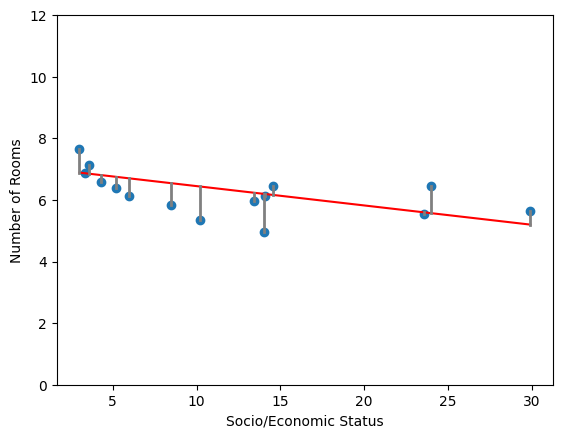

In [9]:
#Display linear model and scatter plot of the test set
#You'll have to make a change here, since BostonHousing has 506 lines. Generate 15 random indices in the range(len(BostonHousing)).
#Select the corresponding values from x_test,y_test, y_predict.  Then proceeed.

#Generate 15 ranomd indices in the range 0..len -1 
num = 15
idx = np.random.choice(len(X_test), size=num, replace=False)

#extract valus from respective samples
X_testL = X_test[idx].ravel()   # make sure 1D
y_predL = y_pred[idx]           # already 1D
y_testL = y_test[idx]

# Sort X and extract the indices in order.  If, X_test[11] is the smallest value, that is the 0th position in the
# the vector
#print(X_test)
order = np.argsort(X_testL)
#print(order)

#reorder samples based on the sort
#print(X_test)
X_testL = X_testL[order]
#print(X_test)
y_predL = y_predL[order]
y_testL = y_testL[order]


plt.scatter(X_testL, y_testL)

plt.xlabel("Socio/Economic Status")
plt.ylabel("Number of Rooms")

#plot the regression line
plt.plot(X_testL, y_predL, color='red')

plt.ylim([0,12])

#Plot the residulas.  See Zybooks 7.2.1, cell 4
for i in range(num):
    plt.plot([X_testL[i], X_testL[i]], [y_testL[i], y_predL[i]], color='grey', linewidth=2)

In [10]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

0.3239278026166578

In [11]:
# Display RMSE
metrics.root_mean_squared_error(y_test, y_pred)

0.5691465563601855

In [12]:
# Create a quadratic model using the training set and predictions using the test set
#convert data to numpy arrays
X_train = np.asarray(X_train) 
y_train = np.asarray(y_train)

'''
Creates cols for each power of x up to 2: x^0, x^1, x^2, now instead of 1 feature per row, the model sees 3
Ex: [2,3,4 becomes:
 [ [1,2,4],
    [1,3, 9],
    [1, 4, 16] }
'''
poly = PolynomialFeatures(degree=2).fit_transform(X_train.reshape(-1, 1))

#estimatestes the coefficients for each col, fitting a linear regression model but on expanded features
# y = b_0 + b_1x + b_2x^2
#minimizeie(yi−(b0+b1xi+b2xi^2))^2
#used in the plot below: y =(poly_reg_model etc.   
poly_reg_model = LinearRegression().fit(poly, y_train)

#Does the same thing to the test set.  
poly_test = PolynomialFeatures(degree=2).fit_transform(X_test.reshape(-1, 1))

#now we're predicting on the test set
y_pred = poly_reg_model.predict(poly_test)

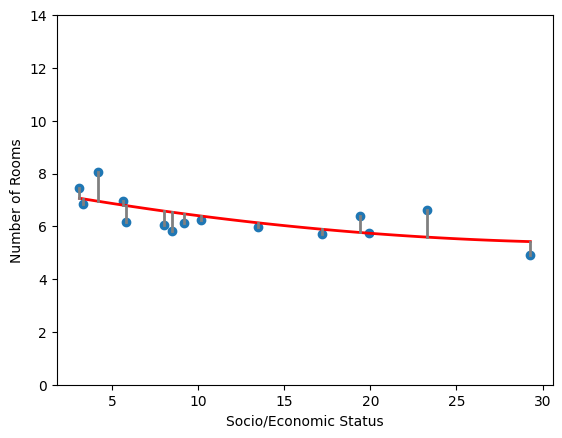

In [14]:
#Display quadratic model and scatter plot of the test set
#You'll have to make a change here, since BostonHousing has 506 lines. Generate 15 random indices in the range(len(BostonHousing)).
#Select the corresponding values from x_test,y_test, y_predict.  Then proceeed.

#Generate 15 ranomd indices in the range 0..len -1 
num = 15
idx = np.random.choice(len(X_test), size=num, replace=False)

#extract valus from respective samples
X_testP = X_test[idx].ravel()   # make sure 1D
y_predP = y_pred[idx]           # already 1D
y_testP = y_test[idx]

# Sort X and extract the indices in order.  If, X_test[11] is the smallest value, that is the 0th position in the
# the vector
#print(X_test)
order = np.argsort(X_testP)
#print(order)

#reorder samples based on the sort
#print(X_test)
X_testP = X_testP[order]
#print(X_test)
y_predP = y_predP[order]
y_testP = y_testP[order]



plt.scatter(X_testP, y_testP)
plt.xlabel("Socio/Economic Status")
plt.ylabel("Number of Rooms")
x = np.linspace(X_testP.min(), X_testP.max(), 100)
y = (
    poly_reg_model.coef_[2] * x**2
    + poly_reg_model.coef_[1] * x
    + poly_reg_model.intercept_
)

plt.plot(x, y, color='red', linewidth=2)
plt.ylim([0, 14])
#blue dots are data points (X_test[i], y_test[i])
for i in range(num):
    plt.plot([X_testP[i], X_testP[i]], [y_testP[i], y_predP[i]], color='grey', linewidth=2)

In [15]:
# Display MSE
metrics.mean_squared_error(y_test, y_pred)

0.3049611162401475

In [16]:
# Display RMSE
#metrics.mean_squared_error(y_test, y_pred, squared=False)
metrics.root_mean_squared_error(y_test, y_pred)

0.5522328460352096